## 排序 （Ranking）

### 棒棒糖图 （Lollipop Chart）

棒棒糖图表以一种视觉上令人愉悦的方式提供与有序条形图类似的目的。

### 导入所需要的库

In [1]:
import numpy as np              # 导入numpy库
import pandas as pd             # 导入pandas库
import matplotlib as mpl        # 导入matplotlib库
import matplotlib.pyplot as plt
import seaborn as sns           # 导入seaborn库

### 设定图像各种属性

In [2]:
large = 22; med = 16; small = 12

params = {'axes.titlesize': large,      # 设置子图上的标题字体
            'legend.fontsize': med,     # 设置图例的字体
            'figure.figsize': (16, 10), # 设置图像的画布
           'axes.labelsize': med,       # 设置标签的字体
            'xtick.labelsize': med,     # 设置x轴上的标尺的字体
            'ytick.labelsize': med,     # 设置整个画布的标题字体
          'figure.titlesize': large}  
plt.rcParams.update(params)             # 更新默认属性
plt.style.use('seaborn-whitegrid')      # 设定整体风格
sns.set_style("white")                  # 设定整体背景风格

### 测试版本

In [3]:
print(mpl.__version__)
print(sns.__version__)
print(pd.__version__)
print(np.__version__)

3.1.0
0.9.0
0.24.2
1.16.4


### 程序代码

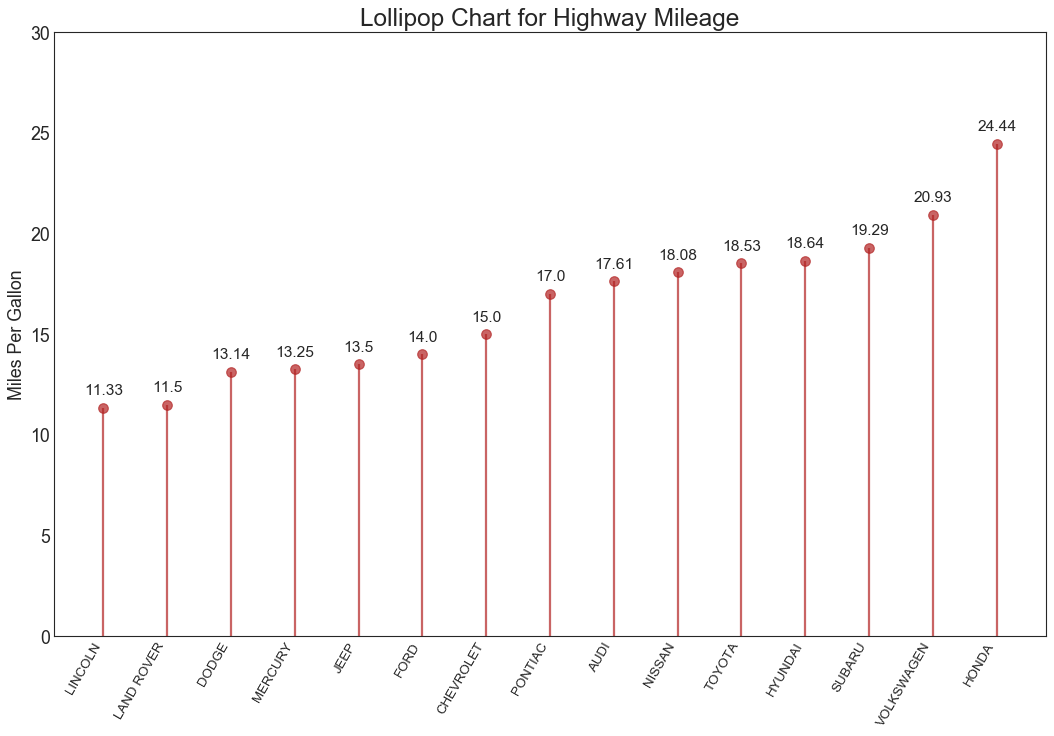

In [4]:
# step1:导入数据
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x:x.mean())
df.sort_values('cty', inplace = True)    # 对'mpg_z这一列数据进行排序
df.reset_index(inplace = True)           # 对排序后的数据重置索引

# step2: 绘制棒棒糖图
    # 创建画布对象以及子图对象
fig,ax = plt.subplots(figsize = (16, 10),    # 画布尺寸
                     facecolor = 'white',    # 画布颜色
                     dpi = 80)               # 分辨率
    # 绘制柱状图
ax.vlines(x = df.index,                 # 横坐标
         ymin = 0,                      # 柱状图在y轴的起点
         ymax = df.cty,                 # 柱状图在y轴的终点
         color = 'firebrick',           # 柱状图的颜色
         alpha = 0.7,                   # 柱状图的透明度
         linewidth = 2)                 # 柱状图的线宽
    # 绘制柱形图上的散点
ax.scatter(x = df.index,                 # 横坐标
          y = df.cty,                   # 纵坐标
         s = 75,                        # 散点的尺寸
         color = 'firebrick',           # 颜色 
         alpha = 0.7)                   # 透明度

# step3：装饰
    # 设置标题、纵坐标的范围、横纵坐标的标题
ax.set_title('Lollipop Chart for Highway Mileage', fontdict={'size':22})   # 设置标题以及字体大小
ax.set_ylabel('Miles Per Gallon')                   # 设置y轴标签 
ax.set_xticks(df.index)                             # 设置x轴标尺刻度
ax.set_xticklabels(df.manufacturer.str.upper(),     # 刻度标尺的内容（先转化为字符串，再转换为大写）
                   rotation=60,                     # 旋转角度
                   fontdict={'horizontalalignment': 'right', 'size':12})   # 相对于刻度标尺右移，且设置字体尺寸
ax.set_ylim(0, 30)                                  # 设置y轴范围

# step3: 注释
for row in df.itertuples():                   # 遍历数据作为横坐标
    ax.text(row.Index,                        # 文本位置的横坐标                      
            row.cty+.5,                       # 文本位置的纵坐标
            s=round(row.cty, 2),              # 对text保留2位小数(照指定的小数位数进行四舍五入运算的结果)
            horizontalalignment= 'center',    # 水平对齐参数
            verticalalignment='bottom',       # 垂直对齐参数
            fontsize=14)                      # 文本尺寸 
plt.show()                                    # 显示图像